## Pointers

We usually use pointers as  
```c
int *ptr;
int x = 12;
ptr = &x;

//and the statement returns true
return *ptr == 12;
```

Pointers to pointers  
```c
int x = 12;
int *ptr = &x;
int **ptr_to_ptr = &ptr;
```

### Muldimensional arrays

In [ ]:
//Relatianship between multidimensional arrays and pointers

#include <stdio.h>

int multi[2][4]; //2x4 array

int main()
{
    printf("\nmulti = %p", multi);
    printf("\nmulti[0] = %p", multi[0]);
    printf("\n&multi[0][0] = %p", &multi[0][0]);
    
    return 0;
}

In [ ]:
//Demonstrates the size of multidimensional arrays

#include <stdio.h>

int multi[2][4]; //2x4 array

int main()
{
    printf("\nThe size of multi = %u", sizeof(multi));
    printf("\nThe size of multi[0] = %u", sizeof(multi[0]));
    printf("\nThe size of multi[0][0] = %u", sizeof(multi[0][0]));
    
    return 0;
}

In [ ]:
//Pointer arithmetic

#include <stdio.h>

int multi[2][4];

int main()
{
    printf("\nThe value of (multi) = %u", multi);
    printf("\nThe value of (multi + 1) = %u", (multi + 1));
    printf("\nThe address of multi[1] = %u", &multi[1]);
        
    return 0;
}

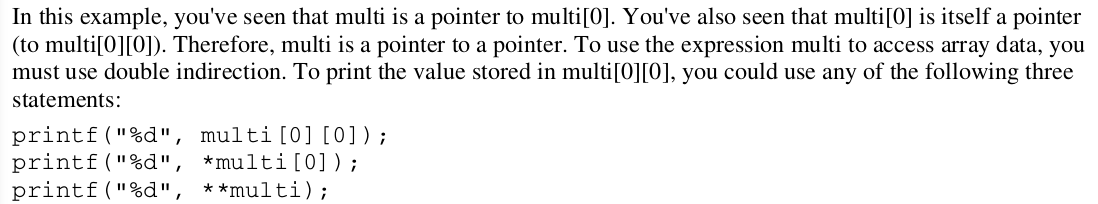

In [ ]:
//Passing multidimensional arrays to functions

#include <stdio.h>

void printarray1(int (*ptr)[4]);
void printarray2(int (*ptr)[4], int n);

int main()
{
    int multi[3][4] = { { 1, 2, 3, 4 },
                       { 5, 6, 7, 8 },
                       { 9, 10, 11, 12 } };
    
    //*ptr is a pointer to an array of 4 ints
    //we use () for pointers of arrays
    int (*ptr)[4];
    
    //set ptr to point to the first element of multi
    ptr = multi;
    
    //with each loop ptr is incremented to point to the next
    //element (4dim array) of multi
    for (int count = 0; count < 3; count++)
        printarray1(ptr++);
    
    printf("\n\nPress Enter...\n");
    getchar();
    
    printarray2(multi, 3);
    printf("\n");
    
    return 0;
}

void printarray1(int (*ptr)[4])
{
    int *p;
    //we typecast ptr from an array to an int
    p = (int *)ptr;
    
    for (int count = 0; count < 4; count++)
        printf("\n%d", *p++);
}

void printarray2(int (*ptr)[4], int n)
{
    int *p;
    //we typecast ptr from an array to an int
    p = (int *)ptr;
    
    for (int count = 0; count < (4 * n); count++)
        printf("\n%d", *p++);
}

### Array of Pointers

Array of pointers to type char  
```c
char *message[10]; //allocates an array of 10 pointers to type char

char *message[3] = { "one", "two", "three" };
//will initialize message[0] to "one", message[1] to "two" and so on
```

In [ ]:
//Initializing pointers to type char

#include <stdio.h>

int main()
{
    char *message[8] = { "Four", "score", "and", "seven",
                        "years", "ago,", "our", "forefathers" };
    
    for (int count = 0; count < 8; count++)
        printf("%s ", message[count]);
    
    return 0;
}

In [ ]:
//Passing an array of pointers to a function

#include <stdio.h>

void print_strings(char *p[], int n);

int main()
{
    char *message[8] = { "Four", "score", "and", "seven",
                        "years", "ago,", "our", "forefathers" };
    
    print_strings(message, 8);
    return 0;
}

void print_strings(char *p[], int n)
{
    for (int count = 0; count < n; count++)
        printf("%s ", p[count]);
}

In [2]:
/* Inputs a list of strings from the keyboard, sorts them, */
/* and then displays them on the screen. */
#include <stdlib.h>
#include <stdio.h>
#include <string.h>
#define MAXLINES 5

int get_lines(char *lines[]);
void sort(char *p[], int n);
void print_strings(char *p[], int n);

char *lines[MAXLINES];
    
int main()
{
    int number_of_lines;
    
    /* Read in the lines from the keyboard. */
    number_of_lines = get_lines(lines);
    
    if ( number_of_lines < 0 )
    {
        puts("Memory allocation error");
        exit(-1);
    }

    sort(lines, number_of_lines);

    printf("\n");
    print_strings(lines, number_of_lines);
    
    return(0);
}

int get_lines(char *lines[])
{
    int n = 0;
    char buffer[80]; /* Temporary storage for each line. */
    
    puts("Enter one line at time; enter a period when done.");
    
    while ((n < MAXLINES) && (scanf("%s", buffer) != 0) && (buffer[0] != '.'))
    {
        if ((lines[n] = (char *)malloc(strlen(buffer)+1)) == NULL)
            return -1;
        
        strcpy( lines[n++], buffer );
    }
    
    return n;
}

void sort(char *p[], int n)
{
    int a, b;
    char *x;

    for (a = 1; a < n; a++)
    {
        for (b = 0; b < n - 1; b++)
        {
            if (strcmp( p[b], p[b + 1] ) > 0)
            {
                x = p[b];
                p[b] = p[b + 1];
                p[b + 1] = x;
            }
        }
    }
}

void print_strings(char *p[], int n)
{
    int count;

    for (count = 0; count < n; count++)
        printf("%s\n", p[count]);
}

Enter one line at time; enter a period when done.
Hello
Twink
Twice
.

Hello
Twice
Twink


### Pointers to functions

Functions are also stored in memory addresses and can be called using pointers.

The general form to declare a pointer to a function is:  
```c
type (*ptr_to_func)(parameter_list);

//examples
int (*func1)(int x);
void (*func2)(double y, double z);
char (*func3)(char *p[]);
void (*func4)();
```